## Preprocessing

In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec
import PIL
import numpy as np

In [2]:
# Read photo data
photo = pd.read_csv("data/clean/quest_clean.csv")
photocols = ['household'] + [col for col in photo if col.startswith('foto')] + ['satellite25', 'satellite100']
photo = photo[photocols]
photo = photo.loc[photo.notna().all(axis='columns')] # complete cases

In [3]:
# Read indicator data
ind = pd.read_csv("data/clean/indicators.csv")[['household', 'exp_all', 'inc_all', 'assets']]
ind = ind.loc[ind.household.isin(photo.household)] # Subset to complete cases photographs

## Photograph quartiles

In [4]:
# 1st quartile 
quart1 = list(ind.loc[(ind['exp_all']<=np.quantile(ind['exp_all'], 0.25))&
                   (ind['inc_all']<=np.quantile(ind['inc_all'], 0.25))&
                   (ind['assets']<=np.quantile(ind['assets'], 0.25)), 
              'household'])

# 2nd quartile 
quart2 = list(ind.loc[(ind['exp_all']>np.quantile(ind['exp_all'], 0.25))&(ind['exp_all']<=np.quantile(ind['exp_all'], 0.5))&
                   (ind['inc_all']>np.quantile(ind['inc_all'], 0.25))&(ind['inc_all']<=np.quantile(ind['inc_all'], 0.5))&
                   (ind['assets']>np.quantile(ind['assets'], 0.25))&(ind['assets']<=np.quantile(ind['assets'], 0.5)),
                                                                      'household'])

# 3rd quartile 
quart3 = list(ind.loc[(ind['exp_all']>np.quantile(ind['exp_all'], 0.5))&(ind['exp_all']<=np.quantile(ind['exp_all'], 0.75))&
                   (ind['inc_all']>np.quantile(ind['inc_all'], 0.5))&(ind['inc_all']<=np.quantile(ind['inc_all'], 0.75))&
                   (ind['assets']>np.quantile(ind['assets'], 0.5))&(ind['assets']<=np.quantile(ind['assets'], 0.75)),
                                                                      'household'])


# 4th quartile 
quart4 = list(ind.loc[(ind['exp_all']>np.quantile(ind['exp_all'], 0.75))&
                   (ind['inc_all']>np.quantile(ind['inc_all'], 0.75))&
                   (ind['assets']>np.quantile(ind['assets'], 0.75)), 
              'household'])

In [5]:
# Utils to help drawing
def plot_quartile(fotodf, quarthh, fotocol):
    ''' Function to plot in a 1x5 grid 2 pictures of a given category
    fotodf: Data frame with the photograph paths
    hhlist: List of households IDs belonging to a category
    maintitle: Superior title of the subplots
    '''
    hhselect = random.sample(quarthh, 1)
        
    fotoimg = list(fotodf.loc[fotodf.household.isin(hhselect), fotocol])
    fotoimg = PIL.Image.open(fotoimg[0])
    fotoimg = fotoimg.rotate(-90, PIL.Image.NEAREST, expand = 1)

    return fotoimg

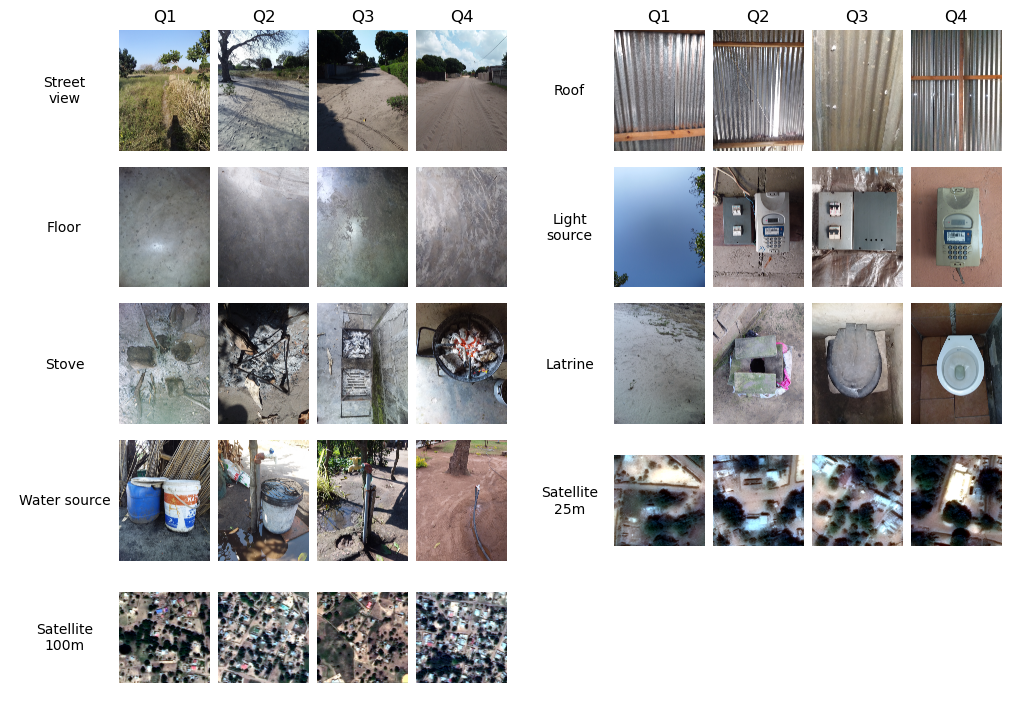

In [6]:
# The figure
random.seed(123)
fig, axs = plt.subplots(5, 10, constrained_layout=True, figsize=(10,7))

# Deactivate all axes
for i in range(5):
    for j in range(10):
        axs[i, j].axis('off')

# Labels
axs[0, 0].text(0.6, 0.5,'Street\nview', horizontalalignment='center', verticalalignment='center')
axs[0, 5].text(0.6, 0.5,'Roof', horizontalalignment='center', verticalalignment='center')
axs[1, 0].text(0.6, 0.5,'Floor', horizontalalignment='center', verticalalignment='center')
axs[1, 5].text(0.6, 0.5,'Light\nsource', horizontalalignment='center', verticalalignment='center')
axs[2, 0].text(0.6, 0.5,'Stove', horizontalalignment='center', verticalalignment='center')
axs[2, 5].text(0.6, 0.5,'Latrine', horizontalalignment='center', verticalalignment='center')
axs[3, 0].text(0.6, 0.5,'Water source', horizontalalignment='center', verticalalignment='center')
axs[3, 5].text(0.6, 0.5,'Satellite\n25m', horizontalalignment='center', verticalalignment='center')
axs[4, 0].text(0.6, 0.5,'Satellite\n100m', horizontalalignment='center', verticalalignment='center')

# Row 1, left: street view
axs[0, 1].imshow(plot_quartile(photo, quart1, 'foto10'))  
axs[0, 2].imshow(plot_quartile(photo, quart2, 'foto10'))  
axs[0, 3].imshow(plot_quartile(photo, quart3, 'foto10'))  
axs[0, 4].imshow(plot_quartile(photo, quart4, 'foto10'))  
axs[0, 1].set_title('Q1')
axs[0, 2].set_title('Q2')
axs[0, 3].set_title('Q3')
axs[0, 4].set_title('Q4')

# Row 1, right: roof
axs[0, 6].imshow(plot_quartile(photo, quart1, 'foto1'))  
axs[0, 7].imshow(plot_quartile(photo, quart2, 'foto1'))  
axs[0, 8].imshow(plot_quartile(photo, quart3, 'foto1'))  
axs[0, 9].imshow(plot_quartile(photo, quart4, 'foto1'))  
axs[0, 6].set_title('Q1')
axs[0, 7].set_title('Q2')
axs[0, 8].set_title('Q3')
axs[0, 9].set_title('Q4')

# Row 2, left: floor
axs[1, 1].imshow(plot_quartile(photo, quart1, 'foto2'))  
axs[1, 2].imshow(plot_quartile(photo, quart2, 'foto2'))  
axs[1, 3].imshow(plot_quartile(photo, quart3, 'foto2'))  
axs[1, 4].imshow(plot_quartile(photo, quart4, 'foto2'))  

# Row 2, right: light source
axs[1, 6].imshow(plot_quartile(photo, quart1, 'foto3'))  
axs[1, 7].imshow(plot_quartile(photo, quart2, 'foto3'))  
axs[1, 8].imshow(plot_quartile(photo, quart3, 'foto3'))  
axs[1, 9].imshow(plot_quartile(photo, quart4, 'foto3'))  

# Row 3, left: stove
axs[2, 1].imshow(plot_quartile(photo, quart1, 'foto7'))  
axs[2, 2].imshow(plot_quartile(photo, quart2, 'foto7'))  
axs[2, 3].imshow(plot_quartile(photo, quart3, 'foto7'))  
axs[2, 4].imshow(plot_quartile(photo, quart4, 'foto7'))  

# Row 3, right: latrine
axs[2, 6].imshow(plot_quartile(photo, quart1, 'foto9'))  
axs[2, 7].imshow(plot_quartile(photo, quart2, 'foto9'))  
axs[2, 8].imshow(plot_quartile(photo, quart3, 'foto9'))  
axs[2, 9].imshow(plot_quartile(photo, quart4, 'foto9'))  

# Row 4, left: water source
axs[3, 1].imshow(plot_quartile(photo, quart1, 'foto11'))  
axs[3, 2].imshow(plot_quartile(photo, quart2, 'foto11'))  
axs[3, 3].imshow(plot_quartile(photo, quart3, 'foto11'))  
axs[3, 4].imshow(plot_quartile(photo, quart4, 'foto11'))  

# Row 4, right: Satellite 25m
axs[3, 6].imshow(plot_quartile(photo, quart1, 'satellite25'))  
axs[3, 7].imshow(plot_quartile(photo, quart2, 'satellite25'))  
axs[3, 8].imshow(plot_quartile(photo, quart3, 'satellite25'))  
axs[3, 9].imshow(plot_quartile(photo, quart4, 'satellite25'))  

# Row 5, left: Satellite 100m
axs[4, 1].imshow(plot_quartile(photo, quart1, 'satellite100'))  
axs[4, 2].imshow(plot_quartile(photo, quart2, 'satellite100'))  
axs[4, 3].imshow(plot_quartile(photo, quart3, 'satellite100'))  
axs[4, 4].imshow(plot_quartile(photo, quart4, 'satellite100'))  

plt.show()

In [11]:
# Write to disk
fig.savefig("figures/quartiles.png", dpi=300) 